In [1]:
import pickle as pk
import glob
from utils.utils import graph_plot

In [3]:
dir='./data/'

TRAIN_DATA_FILES=glob.glob(dir +"*_train.pt")
print(TRAIN_DATA_FILES)
VAL_DATA_FILES=glob.glob(dir+"*_val.pt")
print(VAL_DATA_FILES)
train_dataset=None
for TRAIN_DATA_FILE in TRAIN_DATA_FILES:
    with open(TRAIN_DATA_FILE, 'rb') as f:
        if train_dataset is None:
            train_dataset = pk.load(f)
        else:
            train_dataset+=pk.load(f)

val_dataset = None
for VAL_DATA_FILE in VAL_DATA_FILES:
    with open(VAL_DATA_FILE, 'rb') as f:
        if val_dataset is None:
            val_dataset = pk.load(f)
        else:
            val_dataset+=pk.load(f)   
if train_dataset is not None:
    print('train',len(train_dataset))   
print('val',len(val_dataset))

['./data_nuevo_canal/graph_ind_3t_1c_20240722-091539_train.pt', './data_nuevo_canal/graph_ind_3t_2c_20240722-114813_train.pt', './data_nuevo_canal/graph_ind_3t_2c_20240722-094148_train.pt', './data_nuevo_canal/graph_ind_3t_1c_20240722-095437_train.pt']
['./data_nuevo_canal/graph_ind_3t_2c_20240722-094148_val.pt', './data_nuevo_canal/graph_ind_3t_1c_20240722-095437_val.pt', './data_nuevo_canal/graph_ind_3t_2c_20240722-114813_val.pt', './data_nuevo_canal/graph_ind_3t_1c_20240722-091539_val.pt']
train 68000
val 12000


[1, 1, 1, 0]


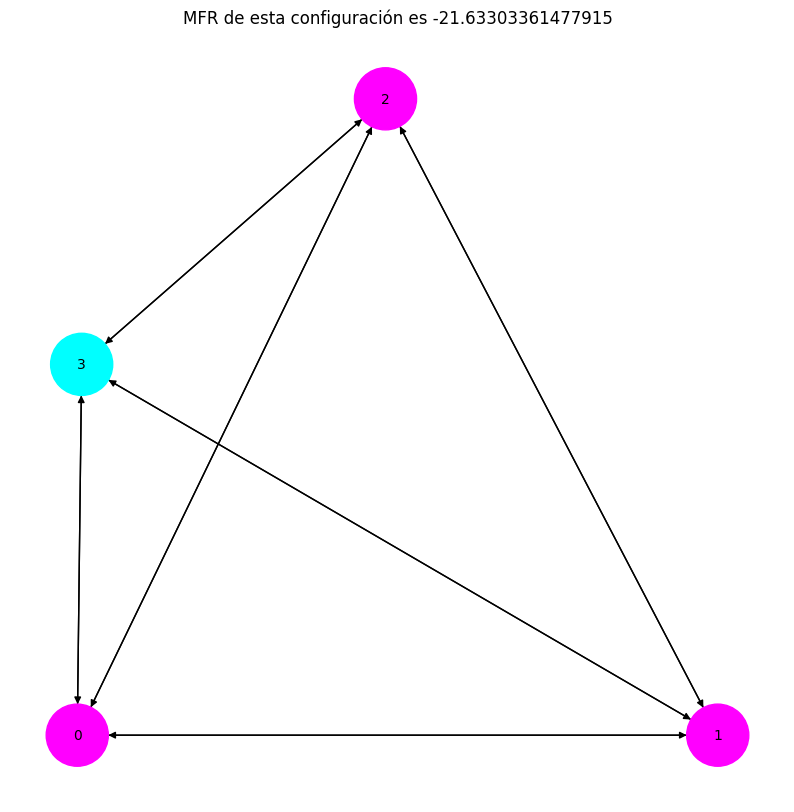

In [3]:
#for i in range(len(train_dataset)):
graph_plot(train_dataset[7].to('cpu'))